In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets


# Load the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = datasets.mnist.load_data()

# Concatenate the training and test sets
X_data = np.concatenate((X_train_full, X_test), axis=0)
y_data = np.concatenate((y_train_full, y_test), axis=0)

# Normalize pixel values between 0 and 1
X_data = X_data / 255.0

# Split the combined dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape data for the neural network input
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [4]:
print(X_data.shape[0])
print(X_train.shape[0])
print(X_val.shape[0])
print(X_test.shape[0])

70000
42000
14000
14000


In [5]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') 
])

# Print the model summary
model.summary()

c:\Users\Asus X513\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model
learning_rate = 0.0001

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=1024, validation_data=(X_val, y_val),verbose=2)

Epoch 1/20
42/42 - 14s - 337ms/step - accuracy: 0.2305 - loss: 2.2396 - val_accuracy: 0.6050 - val_loss: 2.1072
Epoch 2/20
42/42 - 10s - 244ms/step - accuracy: 0.5152 - loss: 1.8653 - val_accuracy: 0.7504 - val_loss: 1.4144
Epoch 3/20
42/42 - 10s - 242ms/step - accuracy: 0.6669 - loss: 1.1774 - val_accuracy: 0.8239 - val_loss: 0.7648
Epoch 4/20
42/42 - 12s - 277ms/step - accuracy: 0.7572 - loss: 0.8013 - val_accuracy: 0.8625 - val_loss: 0.5416
Epoch 5/20
42/42 - 12s - 279ms/step - accuracy: 0.8114 - loss: 0.6281 - val_accuracy: 0.8824 - val_loss: 0.4308
Epoch 6/20
42/42 - 13s - 308ms/step - accuracy: 0.8398 - loss: 0.5318 - val_accuracy: 0.8958 - val_loss: 0.3700
Epoch 7/20
42/42 - 13s - 303ms/step - accuracy: 0.8599 - loss: 0.4667 - val_accuracy: 0.9081 - val_loss: 0.3196
Epoch 8/20
42/42 - 10s - 246ms/step - accuracy: 0.8757 - loss: 0.4147 - val_accuracy: 0.9149 - val_loss: 0.2891
Epoch 9/20
42/42 - 11s - 257ms/step - accuracy: 0.8868 - loss: 0.3800 - val_accuracy: 0.9210 - val_loss:

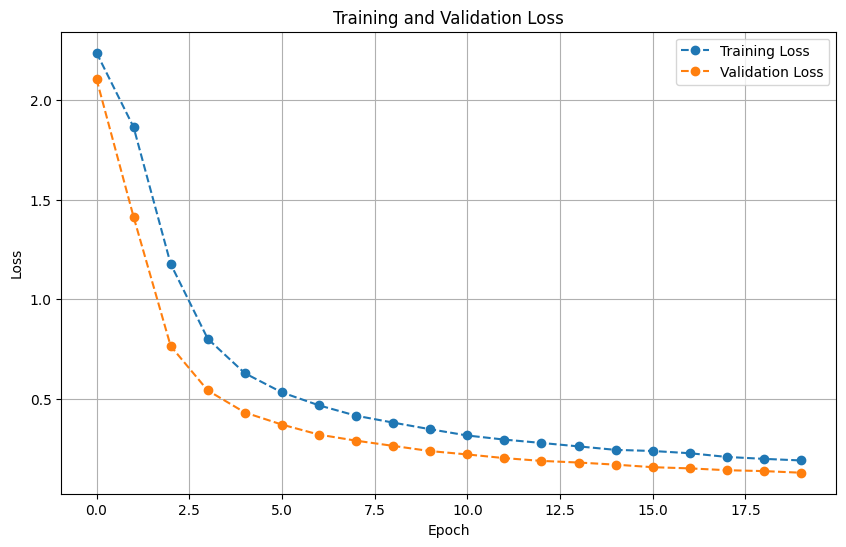

In [7]:
# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1419
           1       0.98      0.98      0.98      1607
           2       0.94      0.95      0.94      1403
           3       0.95      0.94      0.95      1437
           4       0.97      0.97      0.97      1326
           5       0.94      0.96      0.95      1249
           6       0.96      0.98      0.97      1351
           7       0.96      0.96      0.96      1488
           8       0.94      0.92      0.93      1319
           9       0.95      0.94      0.95      1401

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



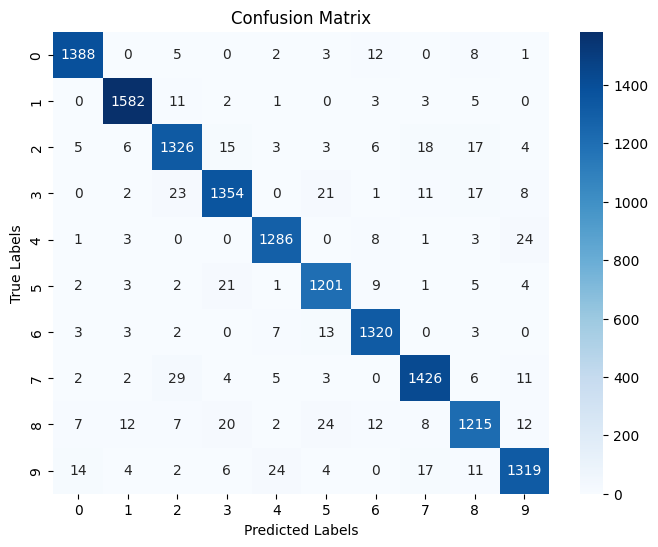

In [8]:

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions from the model
y_pred = model.predict(X_test)  # X_test is your test data

# Assuming y_pred is the predicted probabilities, convert them to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the classification report
print(classification_report(y_test, y_pred_classes, digits=2))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

class_labels = [str(i) for i in range(10)]
# Plot the confusion matrix using seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



In [9]:
number = y_test[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


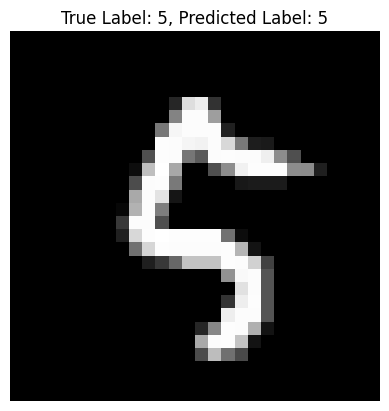

In [10]:
index = 40  # You can change this to test different images
single_image = X_test[index]

# Reshape the image to fit the input shape of the CNN model (batch size of 1, height, width, channels)
single_image_reshaped = single_image.reshape(1, 28, 28, 1)

# Predict the class of the single image
prediction = model.predict(single_image_reshaped)

# Convert the predicted probabilities to a class label
predicted_class = np.argmax(prediction, axis=1)

# Get the true class label
true_class = y_test[index]

# Display the image along with the predicted and true class
plt.imshow(single_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_class}, Predicted Label: {predicted_class[0]}")
plt.axis('off')
plt.show()

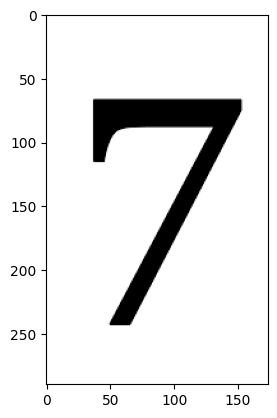

In [11]:
image = cv2.imread("C:/Users/Asus X513/Downloads/downloadss.png")

plt.imshow(image)
plt.show()


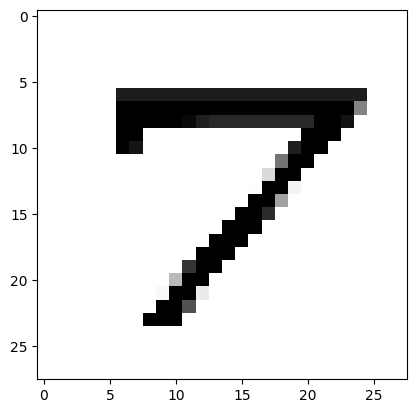

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[1.3098180e-02 6.4554946e-03 4.4213858e-01 7.1937172e-03 6.2446562e-03
  3.8588620e-04 4.7558591e-01 3.7884497e-04 4.8451018e-02 6.7687841e-05]]
Predicted class: 6


In [12]:
# Resize and scale the image
resized_image = tf.image.resize(image, (28, 28))
scaled_image = resized_image / 255

# Convert the RGB image to grayscale
grayscale_image = cv2.cvtColor(np.array(scaled_image), cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.imshow(grayscale_image, cmap='gray')
plt.show()

# Reshape the grayscale image to match the model's expected input shape (1, 28, 28, 1)
grayscale_image = np.expand_dims(grayscale_image, axis=-1)  # (28, 28, 1)
grayscale_image = np.expand_dims(grayscale_image, axis=0)  # Add batch dimension (1, 28, 28, 1)

# Make predictions
y = model.predict(grayscale_image)
print(y)
predicted_class = np.argmax(y, axis=1)[0]

print(f"Predicted class: {predicted_class}")